# Проект "Предсказание эффективности очистки золотосодержащей руды"

Подготовка прототипа модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


## 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
try:
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col ='date', parse_dates=True)
except:
    df_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv', 
                          index_col ='date', parse_dates=True)

In [4]:
try:
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col ='date', parse_dates=True)
except:
    df_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv', 
                          index_col ='date', parse_dates=True)

In [5]:
try:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', 
                           index_col ='date', parse_dates=True)
except:
    df_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv', 
                           index_col ='date', parse_dates=True)

In [6]:
df_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

In [8]:
df_full.shape

(19439, 86)

In [9]:
df_train.shape

(14149, 86)

In [10]:
df_test.shape

(5290, 52)

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 

Таргет - final.output.concentrate_au и rougher.output.concentrate_au.

В тестовых данных 52 столбца против 86 в тренировочных. Пропущены 2 искомых столбца. Обучать модель также стоит на 52 столбцах, так как добавить данные мы не можем.

### Оценка расчета эффективости обогащения

Эффективность обогащения рассчитывается по формуле
(C*(F-T))/(F*(C-T))*100%
где:
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

rougher.output.recovery - эффективость обогащения после флотации. Тогда С - rougher.output.concentrate_au. F - rougher.input.feed_au. Т - rougher.output.tail_au

In [12]:
df_train['rougher.output.recovery_test'] = (
    (df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']))
    *100/(df_train['rougher.input.feed_au']*(df_train['rougher.output.concentrate_au']-df_train['rougher.output.tail_au']))
)

In [13]:
mean_absolute_error(df_train['rougher.output.recovery_test'], df_train['rougher.output.recovery'])

1.1131451184435918e-14

Вывод: МАЕ стремится к нулю, а значит ошибок в расчетах нет.

### Заполнение пропусков

In [14]:
display(df_train.isna().sum())

final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 286
primary_cleaner.output.concentrate_au                   

Попробуем заполнить пропуски методом interpolate. Больше всего пропусков в столбце secondary_cleaner.output.tail_sol, оценим изменения на этом столбце.

In [15]:
df_train_new =df_train.interpolate()

In [16]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb                         14149 non-null  float64
 2   final.output.concentrate_sol                        14149 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14149 non-null  float64
 7   final.output.tail_sol                               14149 non-null  float64
 8   final.output.tail_au                     

In [17]:
df_train['secondary_cleaner.output.tail_sol'].describe()

count    12544.000000
mean         6.938693
std          4.155487
min          0.000000
25%          3.225486
50%          7.302639
75%         10.547068
max         17.976171
Name: secondary_cleaner.output.tail_sol, dtype: float64

In [18]:
df_train_new['secondary_cleaner.output.tail_sol'].describe()

count    14149.000000
mean         6.260474
std          4.363525
min          0.000000
25%          2.120479
50%          6.179968
75%         10.288522
max         17.976171
Name: secondary_cleaner.output.tail_sol, dtype: float64

Изменения есть, но незачительные. Возможо, после обучения модели стоит попробовать сравнить с заполением даных пропусков 0

In [19]:
df_test_new = df_test.interpolate()

In [20]:
df_train_new.corr()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery_test
final.output.concentrate_ag,1.000000,0.021192,0.314380,-0.104636,0.133254,0.289609,-0.109430,0.046074,0.193927,0.015008,0.136818,0.024982,0.167695,0.502801,-0.178736,0.306531,-0.186005,-0.001376,-0.066408,0.161469,0.191251,0.188473,0.041941,0.203532,0.053561,0.165960,0.043283,0.098210,0.007246,-0.016920,-0.027784,-0.037687,0.195324,0.424454,-0.005001,-0.177190,-0.018795,-0.047342,0.276674,-0.118209,0.069094,-0.143620,0.041617,0.288791,-0.167323,-0.041978,0.033207,0.037963,0.191791,-0.032421,0.022972,0.131940,0.115860,-0.188730,0.120134,0.084064,0.099670,0.088060,0.129469,0.083695,0.171411,0.100890,0.154032,0.097247,-0.080093,-0.309389,0.192984,0.044342,-0.067907,0.036821,-0.026850,0.039355,0.054256,0.180709,0.027876,0.208831,0.043438,0.169569,0.020942,0.005372,0.013105,0.228848,0.021732,0.199144,0.170383,0.061009,0.037963
final.output.concentrate_pb,0.021192,1.000000,-0.001077,0.321012,0.095015,-0.100543,0.259453,0.068423,0.029186,0.116694,0.013790,-0.051195,-0.180665,-0.031335,0.388771,-0.065978,0.008713,-0.042597,0.003483,-0.01715

## Подготовка выборок

Разделим данные на целевые и нецелевые признаки. В тестовых данных 53 столбца. В обучающих - 87, из них 2 целевые. Целевые для тестовых данных найдем в полных данных. Модель будем обучать на 52 признаках - дата в обучении не поможет.

In [21]:
target_train_final = df_train_new['final.output.recovery']
target_train_rougher = df_train_new['rougher.output.recovery']

features_train = df_train_new.copy()

df_test_col = df_test_new.columns
features_train_col = features_train.columns

for i in range(len(features_train_col)):
    if features_train_col[i] not in df_test_col:
        features_train=features_train.drop(features_train_col[i], axis=1)
print(features_train.shape)
print(df_train_new.shape)


(14149, 52)
(14149, 87)


In [22]:
columns = ["final.output.recovery","rougher.output.recovery"]

features_test = df_test_new.copy()

df_test_new = df_test_new.join(df_full[columns])

target_test_final = df_test_new["final.output.recovery"]
target_test_rougher = df_test_new["rougher.output.recovery"]

print(features_test.shape)
print(target_test_final.shape)

(5290, 52)
(5290,)


## 2. Анализ данных

### Au

Концентрации золота на разых этапах обработки представлены в следующих столбцах: final.output.concentrate_au, final.output.tail_au, primary_cleaner.output.concentrate_au, primary_cleaner.output.tail_au, rougher.input.feed_au,  rougher.output.concentrate_au, rougher.output.tail_au, secondary_cleaner.output.tail_au

In [23]:
au = df_train_new.loc[:,['rougher.input.feed_au', 'rougher.output.concentrate_au', 
                         'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au', 
                         'final.output.tail_au', 'rougher.output.tail_au','primary_cleaner.output.tail_au', 
                         'secondary_cleaner.output.tail_au']]
au['tail'] = au['rougher.output.tail_au']+ au['primary_cleaner.output.tail_au']+au['secondary_cleaner.output.tail_au']+au['final.output.tail_au']
au.head()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au,final.output.tail_au,rougher.output.tail_au,primary_cleaner.output.tail_au,secondary_cleaner.output.tail_au,tail
date,,,,,,,,,
2016-01-15 00:00:00,6.486150,19.793808,34.174427,42.192020,2.143149,1.170244,2.106679,2.606185,8.026258
2016-01-15 01:00:00,6.478583,20.050975,34.118526,42.701629,2.224930,1.184827,2.353017,2.488248,8.251023
2016-01-15 02:00:00,6.362222,19.737170,33.969464,42.657501,2.257889,1.162562,2.416800,2.458187,8.295438
2016-01-15 03:00:00,6.118189,19.320810,28.260743,42.689819,2.146849,1.079755,2.262051,2.322062,7.810717
2016-01-15 04:00:00,5.663707,19.216101,33.044932,42.774141,2.055292,1.012642,2.277073,2.330448,7.675455


array([[<AxesSubplot:title={'center':'rougher.input.feed_au'}>,
        <AxesSubplot:title={'center':'rougher.output.concentrate_au'}>,
        <AxesSubplot:title={'center':'primary_cleaner.output.concentrate_au'}>],
       [<AxesSubplot:title={'center':'final.output.concentrate_au'}>,
        <AxesSubplot:title={'center':'final.output.tail_au'}>,
        <AxesSubplot:title={'center':'rougher.output.tail_au'}>],
       [<AxesSubplot:title={'center':'primary_cleaner.output.tail_au'}>,
        <AxesSubplot:title={'center':'secondary_cleaner.output.tail_au'}>,
        <AxesSubplot:title={'center':'tail'}>]], dtype=object)

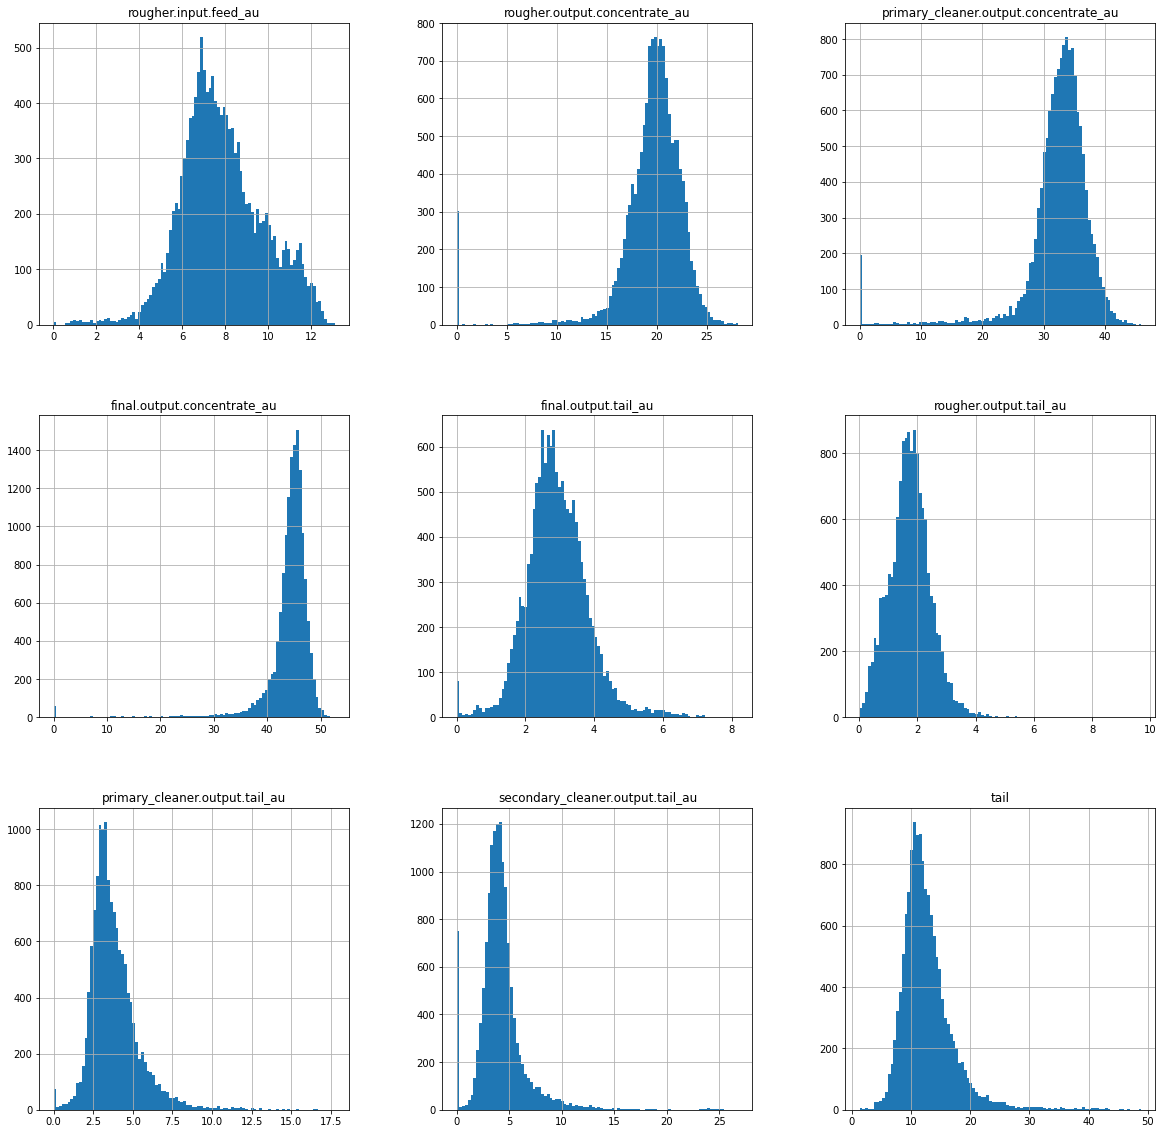

In [24]:
au.hist(figsize=(20,20), bins=100)

<AxesSubplot:xlabel='date'>

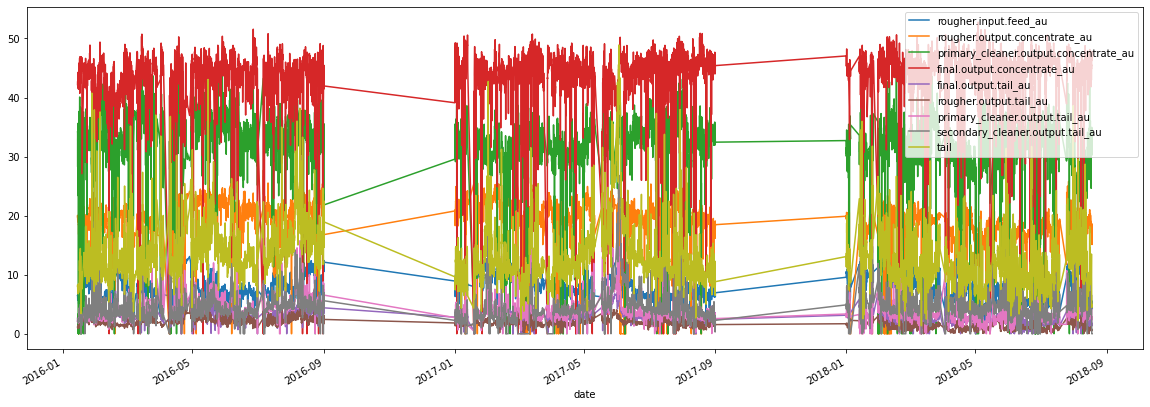

In [25]:
au.plot(figsize=(20,7))

<AxesSubplot:ylabel='date'>

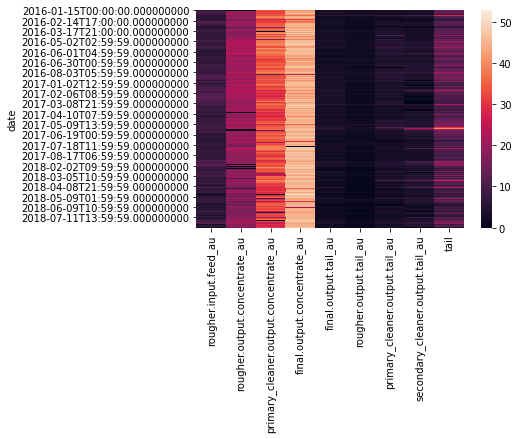

In [26]:
sns.heatmap(au)

В целом, на этих графиках видно, что в процессе обработки количество золота увеличивается. В "хвостах" остается, казалось бы, незначительная часть, но в конечном итоге ее количество даже больше, чем изначального материала.

### Ag

In [27]:
ag = df_train_new.loc[:,['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
                         'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 
                         'final.output.tail_ag', 'rougher.output.tail_ag','primary_cleaner.output.tail_ag', 
                         'secondary_cleaner.output.tail_ag']]
ag['tail'] = ag['rougher.output.tail_ag']+ ag['primary_cleaner.output.tail_ag']+ag['secondary_cleaner.output.tail_ag']+ag['final.output.tail_ag']
ag.head()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag,final.output.tail_ag,rougher.output.tail_ag,primary_cleaner.output.tail_ag,secondary_cleaner.output.tail_ag,tail
date,,,,,,,,,
2016-01-15 00:00:00,6.100378,11.500771,8.547551,6.055403,10.411962,5.008018,14.936526,14.500184,44.856690
2016-01-15 01:00:00,6.161113,11.615865,8.558743,6.029369,10.462676,4.955378,16.250511,14.265474,45.934038
2016-01-15 02:00:00,6.116455,11.695753,8.603505,6.055926,10.507046,4.843460,16.491823,14.115662,45.957991
2016-01-15 03:00:00,6.043309,11.915047,7.221879,6.047977,10.422762,4.655288,16.024359,13.732071,44.834480
2016-01-15 04:00:00,6.060915,12.411054,9.089428,6.148599,10.360302,4.552800,16.480185,14.079996,45.473283


<AxesSubplot:xlabel='date'>

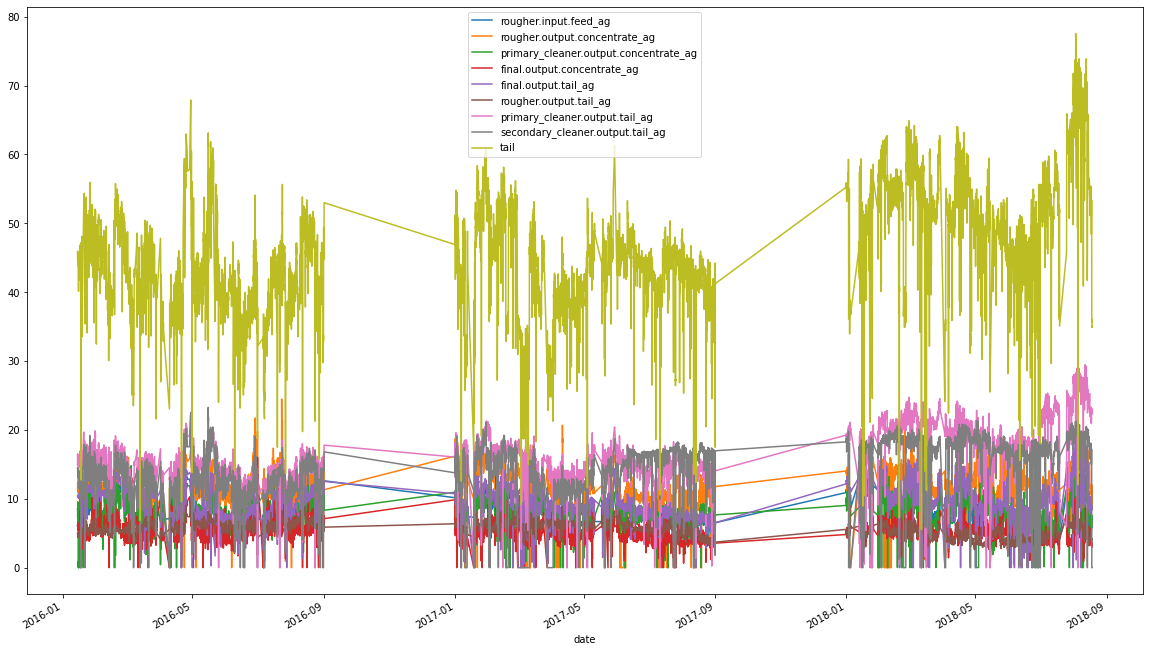

In [28]:
ag.plot(figsize=(20,12))

<AxesSubplot:xlabel='date'>

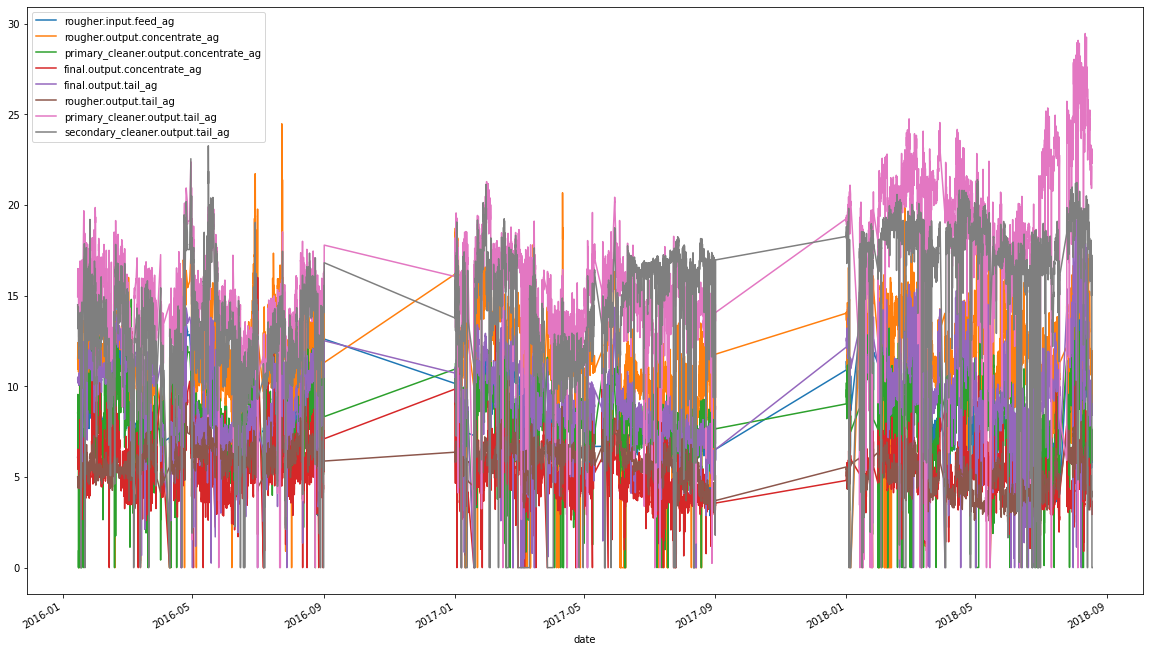

In [29]:
ag.drop(['tail'], axis =1).plot(figsize=(20,12))

<AxesSubplot:ylabel='date'>

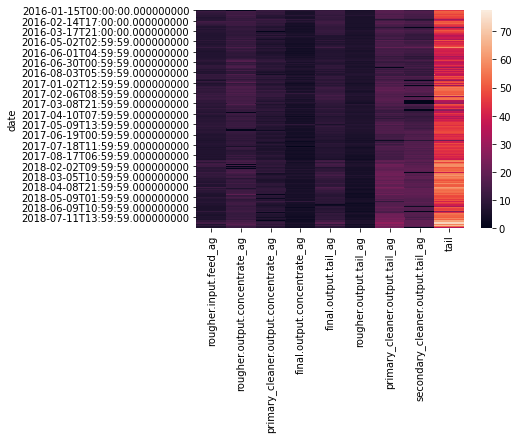

In [30]:
sns.heatmap(ag)

С серебром ситуация интереснее: Большая часть продукта оказывается в хвосте, т.к. выбирается золото, видимо, а серебро уходит, как лишний продукт. В конечном продукте серебра меньше, чем в изначальном.

### Pb

In [31]:
pb = df_train_new.loc[:,['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
                         'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb', 
                         'final.output.tail_pb', 'rougher.output.tail_pb','primary_cleaner.output.tail_pb', 
                         'secondary_cleaner.output.tail_pb']]
pb['tail'] = pb['rougher.output.tail_pb']+ pb['primary_cleaner.output.tail_pb']+pb['secondary_cleaner.output.tail_pb']+pb['final.output.tail_pb']
pb.head()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb,final.output.tail_pb,rougher.output.tail_pb,primary_cleaner.output.tail_pb,secondary_cleaner.output.tail_pb,tail
date,,,,,,,,,
2016-01-15 00:00:00,2.284912,7.101074,10.389648,9.889648,0.895447,0.508728,2.534912,4.694824,8.633911
2016-01-15 01:00:00,2.266033,7.278807,10.497069,9.968944,0.927452,0.536689,3.049646,4.592547,9.106335
2016-01-15 02:00:00,2.159622,7.216833,10.354494,10.213995,0.953716,0.546416,3.124664,4.624775,9.249571
2016-01-15 03:00:00,2.037807,7.175616,8.496563,9.977019,0.883763,0.542525,2.960362,4.482453,8.869103
2016-01-15 04:00:00,1.786875,7.240205,9.986786,10.142511,0.792826,0.515438,3.112100,4.470737,8.891101


<AxesSubplot:xlabel='date'>

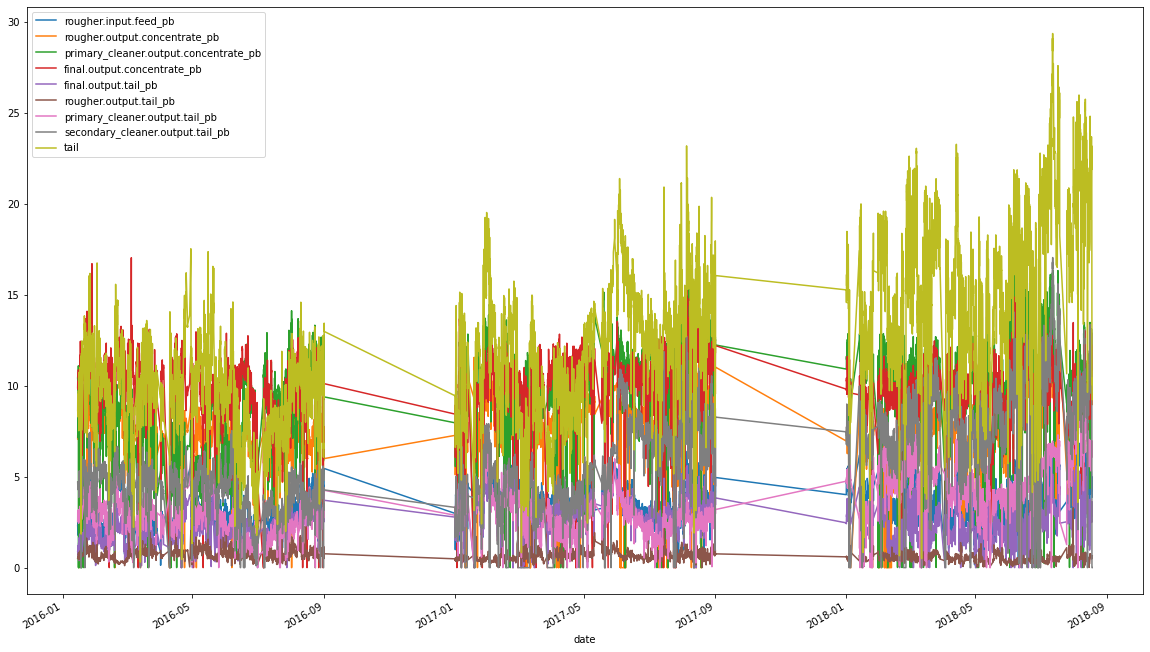

In [32]:
pb.plot(figsize=(20,12))

<AxesSubplot:ylabel='date'>

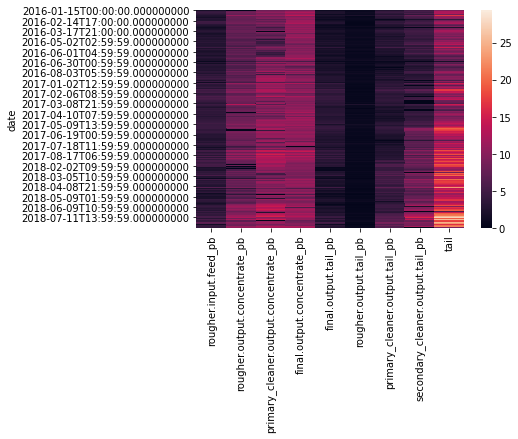

In [33]:
sns.heatmap(pb)

В конечном продукте остается достаточо много свинца, но большая часть ве же попадает в хвост. Концентрация свинца от изначального к конечному материалу увеличивается

### Распределение размеров гранул сырья на обучающей и тестовой выборках

 Относительно размера гранул у нас есть 2 параметра: primary_cleaner.input.feed_size и rougher.input.feed_size. Они есть как в тестовой, так и в обучающей выборке

In [34]:
df_train_new['primary_cleaner.input.feed_size'].describe()

count    14149.000000
mean         7.322310
std          0.614062
min          1.080000
25%          6.960000
50%          7.290000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

<AxesSubplot:xlabel='primary_cleaner.input.feed_size'>

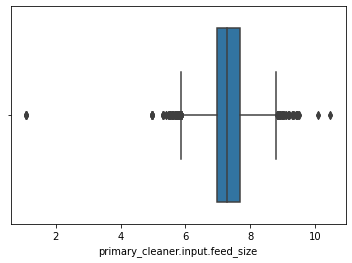

In [35]:
sns.boxplot(data=df_train_new, x= 'primary_cleaner.input.feed_size')

In [36]:
df_test_new['primary_cleaner.input.feed_size'].describe()

count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

<AxesSubplot:xlabel='primary_cleaner.input.feed_size'>

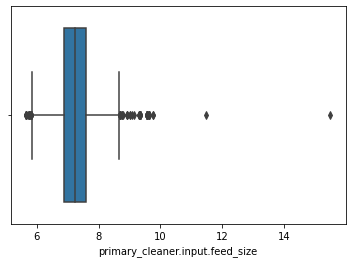

In [37]:
sns.boxplot(data=df_test_new, x= 'primary_cleaner.input.feed_size')

Есть аномалии, но межквартильный размах практически одинаковый.

In [38]:
df_train_new['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.097903
std         23.023690
min          9.659576
25%         48.950593
50%         55.269784
75%         65.982466
max        484.967466
Name: rougher.input.feed_size, dtype: float64

<AxesSubplot:xlabel='rougher.input.feed_size'>

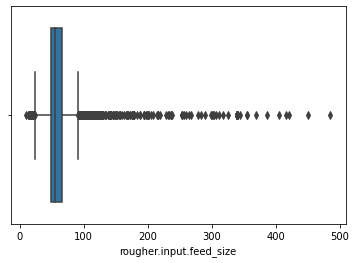

In [39]:
sns.boxplot(data=df_train_new, x= 'rougher.input.feed_size')

In [40]:
df_test_new['rougher.input.feed_size'].describe()

count    5290.000000
mean       55.952835
std        19.080372
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

<AxesSubplot:xlabel='rougher.input.feed_size'>

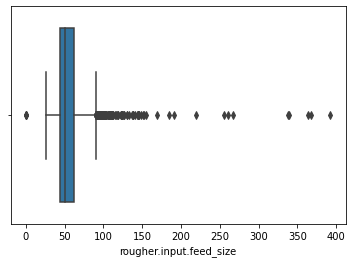

In [41]:
sns.boxplot(data=df_test_new, x= 'rougher.input.feed_size')

Здесь разница немного больше, однако она не критична

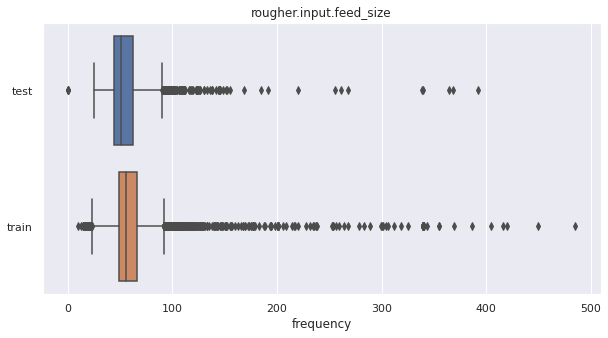

In [45]:
df = pd.concat([df_test_new['rougher.input.feed_size'], df_train_new['rougher.input.feed_size']], axis = 1)
df.columns = ['test','train']
sns.set (rc={"figure.figsize":(10, 5)})
ax = sns.boxplot(data=df, orient = "h")
ax.set_xlabel("frequency")
ax.set_title("rougher.input.feed_size") ;

## Суммарная концентрацию всех веществ на разных стадиях

In [42]:
df_train_new['rougher_input_total'] = (
    df_train_new['rougher.input.feed_ag']+df_train_new['rougher.input.feed_pb']
    +df_train_new['rougher.input.feed_sol'] +df_train_new['rougher.input.feed_au']
)

In [43]:
df_train_new['rougher_output_total'] = (
    df_train_new['rougher.output.concentrate_ag'] + df_train_new['rougher.output.concentrate_pb'] 
    + df_train_new['rougher.output.concentrate_sol'] + df_train_new['rougher.output.concentrate_au']
)

In [44]:
df_train_new['primary_leaner_output_total'] = (
    df_train_new['primary_cleaner.output.concentrate_ag']
    +df_train_new['primary_cleaner.output.concentrate_pb']+df_train_new['primary_cleaner.output.concentrate_sol']
    +df_train_new['primary_cleaner.output.concentrate_au']
)

In [45]:
df_train_new['final_output'] = (
    df_train_new['final.output.concentrate_ag']+df_train_new['final.output.concentrate_pb']
    +df_train_new['final.output.concentrate_sol']+df_train_new['final.output.concentrate_au']
)

<AxesSubplot:xlabel='date'>

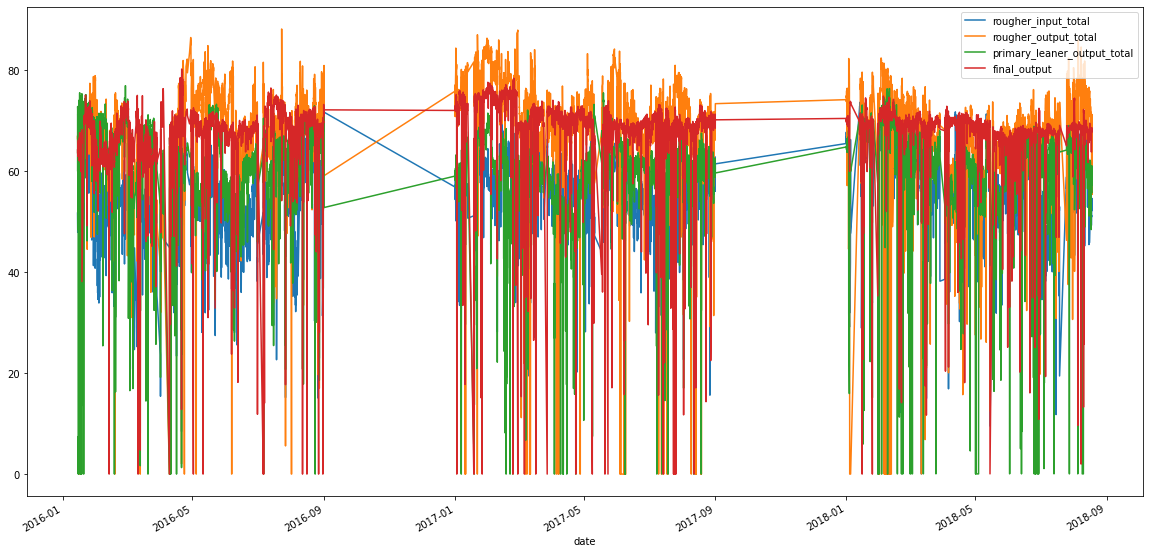

In [46]:
int_df = df_train_new.loc[:,['rougher_input_total', 'rougher_output_total', 'primary_leaner_output_total', 'final_output']]
int_df.plot(figsize= (20,10))

<AxesSubplot:ylabel='date'>

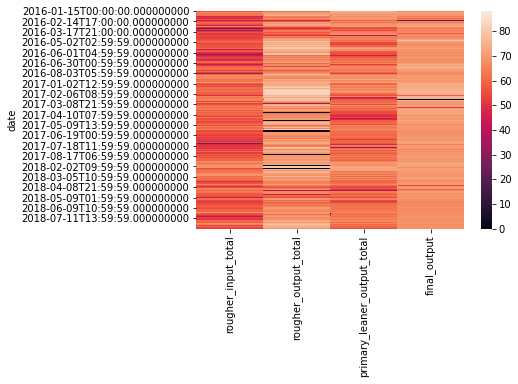

In [47]:
sns.heatmap(int_df)

Минимальная концентрация всех веществ в материале до обработки. Суммарная концентрация всех веществ в конечном продукте и материале после флотации сопоставимо. Это объясняется тем, что в итоговом варианте большая концентрация золота, а содержание остальных веществ снижено.

In [48]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   rougher_input_total          14149 non-null  float64
 1   rougher_output_total         14149 non-null  float64
 2   primary_leaner_output_total  14149 non-null  float64
 3   final_output                 14149 non-null  float64
dtypes: float64(4)
memory usage: 552.7 KB


array([[<AxesSubplot:title={'center':'rougher_input_total'}>,
        <AxesSubplot:title={'center':'rougher_output_total'}>],
       [<AxesSubplot:title={'center':'primary_leaner_output_total'}>,
        <AxesSubplot:title={'center':'final_output'}>]], dtype=object)

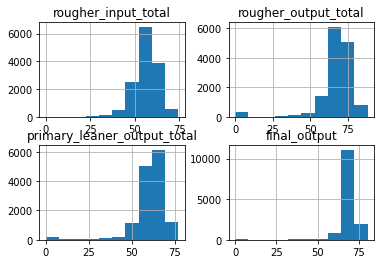

In [49]:
int_df.hist()

<AxesSubplot:>

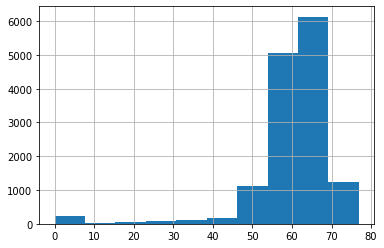

In [50]:
int_df['primary_leaner_output_total'].hist()

In [51]:
int_df.describe()

,rougher_input_total,rougher_output_total,primary_leaner_output_total,final_output
count,14149.000000,14149.000000,14149.000000,14149.000000
mean,56.238667,67.178166,60.173312,68.395671
std,7.028115,12.703461,10.443794,7.016871
min,0.040000,0.000000,0.000000,0.000000
25%,52.573579,64.925021,58.046816,67.562287
50%,56.617697,69.175663,61.776989,69.142447
75%,60.762971,73.429929,65.354954,70.974661
max,74.458253,88.140119,76.918076,80.210644


In [52]:
int_df[int_df.rougher_input_total<25].count()

rougher_input_total            43
rougher_output_total           43
primary_leaner_output_total    43
final_output                   43
dtype: int64

In [53]:
int_df[int_df.rougher_output_total<25].count()

rougher_input_total            323
rougher_output_total           323
primary_leaner_output_total    323
final_output                   323
dtype: int64

In [54]:
int_df[int_df.primary_leaner_output_total<25].count()

rougher_input_total            299
rougher_output_total           299
primary_leaner_output_total    299
final_output                   299
dtype: int64

In [55]:
int_df[int_df.final_output<25].count()

rougher_input_total            112
rougher_output_total           112
primary_leaner_output_total    112
final_output                   112
dtype: int64

Средние значения всех показателей 56-70. 1 квартиль - выше 50. Показатели меньше 25 можно считать аномалиями, их стоит удалить. Это 5% всех данных

In [56]:
df_train_new = df_train_new[df_train_new.rougher_input_total >=25]

In [57]:
df_train_new = df_train_new[df_train_new.rougher_output_total >=25]

In [58]:
df_train_new = df_train_new[df_train_new.primary_leaner_output_total >=25]

In [59]:
df_train_new = df_train_new[df_train_new.final_output >=25]
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13444 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         13444 non-null  float64
 1   final.output.concentrate_pb                         13444 non-null  float64
 2   final.output.concentrate_sol                        13444 non-null  float64
 3   final.output.concentrate_au                         13444 non-null  float64
 4   final.output.recovery                               13444 non-null  float64
 5   final.output.tail_ag                                13444 non-null  float64
 6   final.output.tail_pb                                13444 non-null  float64
 7   final.output.tail_sol                               13444 non-null  float64
 8   final.output.tail_au                     

# Модель

## Функция для вычисления итоговой sMAPE

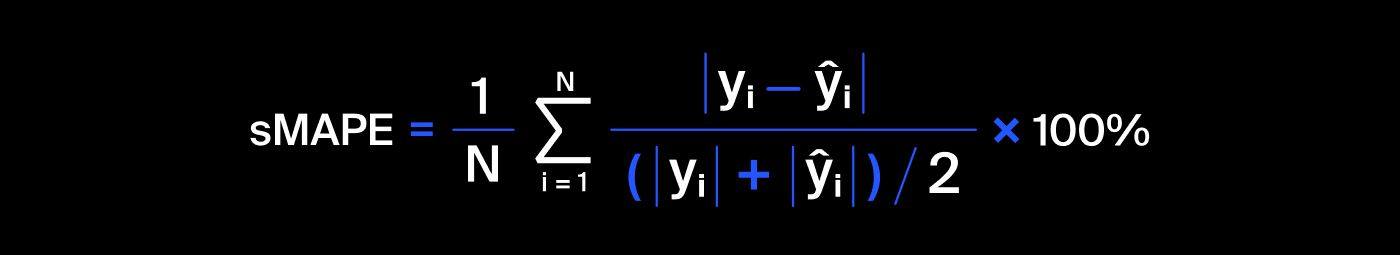

In [60]:
def smape (test, predict):
    smape = ((abs(test-predict))*100/(0.5*(abs(test))+abs(predict))).sum()/len(test)
    return smape
smape_score = make_scorer(smape, greater_is_better=False)

##  Обучение модели

#### Линейная регрессия

In [61]:
model = LinearRegression()
scores = cross_val_score(model, features_train, target_train_final, cv=5, scoring = smape_score)
final_score_fin = sum(scores)/len(scores)
final_score_fin

-8.00019216418402

In [62]:
model = LinearRegression()
scores = cross_val_score(model, features_train, target_train_rougher, cv=5, scoring = smape_score)
final_score_ro = sum(scores)/len(scores)
final_score_ro

-7.803509149939336

In [63]:
total_smape = 0.25*final_score_ro + 0.75*final_score_fin
print('Итоговый smape для линейой регрессии:', total_smape)

Итоговый smape для линейой регрессии: -7.9510214106228485


#### Случайный лес

In [ ]:
%%time

clf = RandomForestRegressor()
parametrs = {'n_estimators': range (10, 200, 20), 'max_depth': range (1,9)}
grid = GridSearchCV(clf, parametrs, cv=5, scoring = smape_score, n_jobs=-1)
grid.fit(features_train, target_train_final)
print(grid.best_params_)
final_score_fin = grid.best_score_
final_score_fin

In [64]:
total_smape = 0.25*final_score_ro + 0.75*final_score_fin
print('Итоговый smape для случайного леса:', total_smape)

Итоговый smape для случайного леса: -7.9510214106228485


## Дамми-модель

In [68]:
dummy_clf = DummyRegressor(strategy="mean")
dummy_clf.fit(features_train, target_train_final)

final_score_fin = smape_score(dummy_clf, features_test, target_test_final)

final_score_fin

-6.585793450405846

In [69]:
dummy_clf = DummyRegressor(strategy="mean")
dummy_clf.fit(features_train, target_train_rougher)

final_score_ro = smape_score(dummy_clf, features_test, target_test_rougher)

final_score_ro

-6.314151362268114

In [70]:
total_smape = 0.25*final_score_ro + 0.75*final_score_fin
print('Итоговый smape для дамми-модели:', total_smape)

Итоговый smape для дамми-модели: -6.517882928371413


# Тестовая выборка

In [71]:
model = RandomForestRegressor(random_state=12345, n_estimators=150, max_depth=4)
model.fit(features_train, target_train_final)
predicted_test = model.predict(features_test)
final_score_fin = smape_score(model, features_test, target_test_final)
final_score_fin

-6.008535999119188

In [72]:
model = RandomForestRegressor(random_state=12345, n_estimators=150, max_depth=6)
model.fit(features_train, target_train_rougher)
predicted_test = model.predict(features_test)
final_score_ro = smape_score(model, features_test, target_test_rougher)
final_score_ro

-6.360097535830544

In [73]:
total_smape = 0.25*final_score_ro + 0.75*final_score_fin
print('Итоговый smape для теста:', total_smape)

Итоговый smape для теста: -6.096426383297026


## Вывод 
Итак, мы изучили и проверили данные, провели их предобработку. Изучили разные показатели процесса и их взаимосвязь, удалили аномальные результаты. Построили 2 модели на обучающей выборке, оценили их качество кросс-валидацией. Качество моделей оценивали с помощью метрики sMAPE. 
    
В результате были подобраны лучшие гиперпараметры. sMAPE итоговой модели = -6.1
    
sMAPE константной модель -6,5
